<a href="https://colab.research.google.com/github/Lenakirara/Data_Science_Alura/blob/main/dados_aluguel_imovel_rj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados de Aluguel de imóveis do Rio de Janeiro

### Problema de Negócio

Fomos contratados por uma seguradora que nos forneceu uma base de dados para executarmos um trabalho de inteligência. E analisarmos os dados referente a locação de imóveis na cidade do Rio de Janeiro.

### Base de dados utilizada

Informação de locação imóveis no Rio de Janeiro - Disponibilizado pela Alura durante o curso de Data Science.

# Relatório de análise I

### Importando base de dados

In [1]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Data_Science/PYTHON-PANDAS-TRATANDO-ANALISANDO-DADOS/aluguel.csv', sep=';')
df_data.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


### Buscando algumas informações

In [3]:
# tipo do dataframe
type(df_data)

pandas.core.frame.DataFrame

In [4]:
# informações do dataframe
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


### Informação geral da base de dados

In [5]:
df_data.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [6]:
# mostrar em formato dataframe 
type_data = pd.DataFrame(df_data.dtypes, columns = ['Tipo de dados'])

In [7]:
type_data.columns.name = 'Variáveis'
type_data

Variáveis,Tipo de dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [8]:
# qtd variaveis
type_data.shape

(9, 1)

In [9]:
print(f'''
A base de dados apresenta: 
- {df_data.shape[0]} registros de imóveis
- {df_data.shape[1]} variáveis
''')


A base de dados apresenta: 
- 32960 registros de imóveis
- 9 variáveis



# Relatório de análise II

#### Analisando os tipos de imóveis

In [10]:
df_data['Tipo']
# outra forma
# df_data.Tipo

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [11]:
type_property = df_data['Tipo']

In [12]:
type(type_property)

pandas.core.series.Series

In [13]:
# buscar informação sem repetição
type_property.drop_duplicates()

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [14]:
# inplace=True -> garante a busca de informaação sem duplicação
# modifica o que foi solicitado
type_property.drop_duplicates(inplace=True)
type_property

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

### Organizando a visualização dos dados

In [15]:
type_property = pd.DataFrame(type_property)
type_property

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [16]:
# alterando os indices - o indice está bagunçado
type_property.index

Int64Index([    0,     1,     2,     3,     7,    16,    17,    29,    80,
               83,   117,   159,   207,   347,   589,  2157,  3354,  4379,
             4721,  6983,  9687, 23614],
           dtype='int64')

In [17]:
# atribuir um indice - primeiro verifica o tamanho
type_property.shape[0]

22

In [18]:
# colocando o tamanho dentro do range
range(type_property.shape[0])

range(0, 22)

In [19]:
# iterando o range para ver como ele funciona
for i in range(type_property.shape[0]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [20]:
# colocando um range no tipo_imovel
type_property.index = range(type_property.shape[0])

In [21]:
# verificando o range do indice
type_property.index

RangeIndex(start=0, stop=22, step=1)

In [22]:
type_property

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


In [23]:
# colocando nome na coluna de indice
type_property.columns.name = 'Id'
type_property

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


## Relatório de análise III

### Analisando imóveis residenciais

In [24]:
df_data.head(1)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0


In [25]:
# selecionando os imoveis
list(df_data['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [26]:
# criando lista somente com tipos residencial
residential = ['Quitinete',
               'Casa',
               'Apartamento',
               'Casa de Condomínio',
               'Casa de Vila']
residential

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [27]:
# verificando algum imovel
# isin -> verificar se esse tipo existe
df_data['Tipo'].isin(residential).head()

0     True
1     True
2    False
3     True
4     True
Name: Tipo, dtype: bool

In [28]:
# guardando uma Series
selection = df_data['Tipo'].isin(residential)
selection

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [29]:
# criando um novo dataframe
residential_data = df_data[selection]
residential_data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [30]:
# verificando se manteve a verificação dentro desse novo dataframe
list(residential_data['Tipo'].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [31]:
# vendo tamanho
residential_data.shape[0]

22580

In [32]:
df_data.shape[0]

32960

- Residencial temos: 22.580
- Dados iniciais temos: 32.960

In [33]:
# reconstruir o indice
residential_data.index = range(residential_data.shape[0])
residential_data

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Exportando base de dados

### Arquivo csv 

In [34]:
residential_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Data_Science/PYTHON-PANDAS-TRATANDO-ANALISANDO-DADOS/aluguel_residencial.csv', sep=';')

In [35]:
residential_data_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Data_Science/PYTHON-PANDAS-TRATANDO-ANALISANDO-DADOS/aluguel_residencial.csv', sep=';')

In [36]:
residential_data_2.head(3)

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0


Nota-se que ao fazer importação do segundo arquivo, acabamos importando o índice também. Precisamos retirar esse indice do dataframe

In [37]:
# index=False => para retirar o indice 
residential_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Data_Science/PYTHON-PANDAS-TRATANDO-ANALISANDO-DADOS/aluguel_residencial.csv', sep=';', index=False)


In [38]:
residential_data_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Data_Science/PYTHON-PANDAS-TRATANDO-ANALISANDO-DADOS/aluguel_residencial.csv', sep=';')

In [39]:
residential_data_2.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0


## Relatório de análise IV

#### Seleções e Frequências

- Selecione somente os imóveis classificados com tipo 'Apartamento'.

- Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.

- Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.

- Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.

In [40]:
residential_data_2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [41]:
# Selecione somente os imóveis classificados com tipo 'Apartamento'.
selection = residential_data_2['Tipo'] == 'Apartamento'
selection

0        False
1        False
2         True
3         True
4         True
         ...  
22575     True
22576    False
22577     True
22578     True
22579     True
Name: Tipo, Length: 22580, dtype: bool

In [42]:
# frequencia da seleção
n1 = residential_data_2[selection].shape[0]
n1

19532

In [43]:
# Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
selection = (residential_data_2['Tipo'] == 'Casa') | (residential_data_2['Tipo'] == 'Casa de Condomínio') | (residential_data_2['Tipo'] == 'Casa de Vila')
n2 = residential_data_2[selection].shape[0]
n2

2212

- Apartamentos: 19.532
- Casa: 2.212

In [44]:
# Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
# 60 >= area <= 100
selection = (residential_data_2['Area'] >= 60) & (residential_data_2['Area'] <= 100)
n3 = residential_data_2[selection].shape[0]
n3

8719

In [45]:
# Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.
selection = (residential_data_2["Quartos"] >= 4) & (residential_data_2['Valor'] < 2000)
n4 = residential_data_2[selection].shape[0]
n4

41

In [46]:
print(f'''
Nº de imóveis classificados com tipo 'Apartamento' -> {n1}
Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila' -> {n2}
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> {n3}
Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> {n4}
''')


Nº de imóveis classificados com tipo 'Apartamento' -> 19532
Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila' -> 2212
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> 8719
Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> 41



# Relatório análise V

### Tratando dados faltantes

In [47]:
residential_data_2.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


Nota-se que na coluna 'Condiminio' temos alguns valores NAN

In [48]:
# analisando dados faltantes
# metodo - isnull
residential_data_2.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [49]:
# utilizando otra forma de analisar dados faltantes
residential_data_2.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
22575,True,True,True,True,True,True,True,True,True
22576,True,True,True,True,True,True,True,True,True
22577,True,True,True,True,True,True,True,True,True
22578,True,True,True,True,True,True,True,True,True


In [50]:
residential_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


Percebe-se que temos valores nulos nas colunas: 'Valor', 'Condominio' e 'IPTU'

In [51]:
# visualizando quem são esses valores NaN
residential_data_2[residential_data_2['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [52]:
# eliminar o NaN
eliminate_nan = residential_data_2.shape[0]
# subset -> lista com a variavel para fazer o drop
residential_data_2.dropna(subset=['Valor'], inplace=True)
eliminate = residential_data_2.shape[0]
eliminate_nan - eliminate

9

Eliminamos 9

### Tratamento condicional

In [53]:
# Quanto valores nulos de condominio
residential_data_2[residential_data_2['Condominio'].isnull()].shape[0]

1813

In [54]:
# identificar os tipo apartamento e condominio nulo
selection = (residential_data_2['Tipo'] == 'Apartamento') & (residential_data_2['Condominio'].isnull())

In [55]:
a = residential_data_2.shape[0]
# ~selection => inverte a Series booleana
residential_data_2 = residential_data_2[~selection]
b = residential_data_2.shape[0]
a - b

745

In [56]:
residential_data_2[residential_data_2['Condominio'].isnull()].shape[0]

1068

In [57]:
# fillna - substitui valores nulos - atribuir valor zero
residential_data_2 = residential_data_2.fillna({'Condominio': 0, 'IPTU': 0})

In [58]:
residential_data_2[residential_data_2['Condominio'].isnull()].shape[0]

0

In [59]:
residential_data_2[residential_data_2['IPTU'].isnull()].shape[0]

0

In [60]:
residential_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [61]:
# salvando arquivo com as informações
residential_data_2.to_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Data_Science/PYTHON-PANDAS-TRATANDO-ANALISANDO-DADOS/aluguel_residencial.csv', sep=';', index=False)

# Relatório VI

Precisamos criar novas variáveis (colunas) para o conjunto de dados. Um das variáveis abrigará o valor bruto do aluguel; outra que armazena o valor com base no metrô quadrado de um imóvel e, por fim, uma nova variável de tipo que agregue casas e apartamentos.

### Criando novas variávies

In [62]:
residential_data_2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


### Coluna - 'Valor Bruto'

In [63]:
# valor bruto
residential_data_2['Valor Bruto'] = residential_data_2['Valor'] +  residential_data_2['Condominio'] + residential_data_2['IPTU']
residential_data_2.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0


### Coluna - 'Valor m²'

In [64]:
residential_data_2['Valor m²'] = residential_data_2['Valor'] / residential_data_2['Area']
residential_data_2.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m²
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.500000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.000000
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.333333


coluna que armazenará o valor por metro quadrado, chamaremos essa nova coluna de Valor m2. Iremos coletar Valor e dividi-lo por Area

In [65]:
# arredondando 'round'
residential_data_2['Valor m²'] = residential_data_2['Valor m²'].round(2)
residential_data_2.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m²
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33


### Criar uma coluna para o valor do bruto do metro quadrado(Valor Bruto m²)


In [66]:
residential_data_2['Valor Bruto m²'] = (residential_data_2['Valor Bruto']/df_data['Area']).round(2)
residential_data_2.head(1)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m²,Valor Bruto m²
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.5,56.5


 criaremos uma coluna que abrigue os tipos de imóvel casa e apartamento, para tanto, devemos coletar a coluna 'Tipo' e recolher esses marcadores e indentifica-los.

In [67]:
# lista com identificação das casas
house = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

### Coluna - 'Tipo Agregado'

criaremos efetivamente a nova variável que chamaremos de Tipo Agregado. Depois, evocaremos dados e passaremos a variável Tipo, seguido do método apply(). Esse método permite que apliquemos uma função à cada registro do DataFrame. Para tanto, criaremos uma função lambda : 'lambda x: 'Casa' if x in casa else 'Apartamento'

In [68]:
# apply = aplica uma função em cada linha em cada registro
residential_data_2['Tipo Agregado'] = residential_data_2['Tipo'].apply(lambda x: 'Casa' if x in house else 'Apartamento')
residential_data_2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m²,Valor Bruto m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,8.07,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,68.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,23.11,Apartamento


Verificamos que a coluna 'Valor Bruto' possui valores não muito confiáveis, pois a coluna 'IPTU' nem sempre possui valores declarados. Com isso iremos excluir as colunas: 'Valor Bruto' e 'Valor Bruto m²'

### Excluindo variaveis

Chamaremos nosso banco de dados auxiliar de dados_aux, que receberá partes do do banco dados. Em seguida, passaremos uma lista de variáveis que serão utilizadas: Tipo Agregado, Valor m2, Valor Bruto e Valor Bruto m2.

In [69]:
# criando dataframe auxiliar
data_aux = pd.DataFrame(residential_data_2[['Tipo Agregado', 'Valor m²', 'Valor Bruto', 'Valor Bruto m²']])

In [70]:
# informação das colunas que foram criadas
data_aux

,Tipo Agregado,Valor m²,Valor Bruto,Valor Bruto m²
0,Apartamento,42.50,2260.0,56.50
1,Casa,70.00,7000.0,70.00
2,Apartamento,53.33,1210.0,8.07
3,Apartamento,16.67,1030.0,68.67
5,Apartamento,26.00,1618.0,23.11
...,...,...,...,...
22575,Apartamento,12.86,1438.0,15.98
22576,Apartamento,29.63,1175.0,31.76
22577,Apartamento,23.08,2640.0,33.85
22578,Apartamento,29.17,1946.0,7.78


Existem formas de excluir as colunas: **del** | **.pop()** | **.drop()**

Obs.: O método .drop() pode funcionar tanto na linha quanto na coluna

In [71]:
del data_aux['Valor Bruto']

In [72]:
data_aux.head(8)

,Tipo Agregado,Valor m²,Valor Bruto m²
0,Apartamento,42.50,56.50
1,Casa,70.00,70.00
2,Apartamento,53.33,8.07
3,Apartamento,16.67,68.67
5,Apartamento,26.00,23.11
6,Casa,29.33,440.00
7,Casa,15.38,1.33
9,Apartamento,21.43,3.19


In [73]:
data_aux.pop('Valor Bruto m²')

0        56.50
1        70.00
2         8.07
3        68.67
5        23.11
         ...  
22575    15.98
22576    31.76
22577    33.85
22578     7.78
22579    50.13
Name: Valor Bruto m², Length: 21826, dtype: float64

In [74]:
# vendo como ficou o dataframe
data_aux

,Tipo Agregado,Valor m²
0,Apartamento,42.50
1,Casa,70.00
2,Apartamento,53.33
3,Apartamento,16.67
5,Apartamento,26.00
...,...,...
22575,Apartamento,12.86
22576,Apartamento,29.63
22577,Apartamento,23.08
22578,Apartamento,29.17


In [75]:
# usando .drop() - axis=1 (coluna)
residential_data_2.drop(['Valor Bruto', 'Valor Bruto m²'], axis=1, inplace=True)
residential_data_2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [76]:
# exportar e subscrever o relatorio
residential_data_2.to_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Data_Science/PYTHON-PANDAS-TRATANDO-ANALISANDO-DADOS/aluguel_residencial.csv', sep=';', index=False)

# Relatório de análise VII

Nosso próximo passo agora é não apenas coletar a média geral, mas sim a média segundo alguns tipos de variáveis. Para facilitar a visualização.

### Criando agrupamentos

- Fazendo estatísticas descritivas

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [77]:
data_district = residential_data_2.copy()
data_district.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [78]:
# média do valor total
data_district['Valor'].mean()

5046.172821405663

In [79]:
# valor medio para determinados bairros do RJ com relação a 'Bairro'
district = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selection = data_district['Bairro'].isin(district)
#criando novo dataframe
data_district = data_district[selection]

In [80]:
# selecionando bairros sem duplicar (somente bairros selecionados)
data_district['Bairro'].drop_duplicates()

0          Copacabana
6     Barra da Tijuca
17             Tijuca
21            Ipanema
25           Botafogo
29             Leblon
81           Flamengo
Name: Bairro, dtype: object

In [81]:
# criar o 1º grupo sobre 'bairros'
district_group = data_district.groupby('Bairro')

In [82]:
# vendo o tipo de variável
type(district_group)

pandas.core.groupby.generic.DataFrameGroupBy

In [83]:
# vendo o que foi criando dentro desse objeto usando a propriedade 'groups'
# fazendo indexação do dataframe
district_group.groups

{'Barra da Tijuca': [6, 16, 18, 23, 32, 34, 37, 44, 45, 63, 64, 67, 71, 77, 82, 97, 111, 114, 116, 122, 136, 138, 142, 156, 159, 161, 171, 172, 180, 195, 198, 217, 224, 231, 234, 243, 246, 249, 254, 269, 275, 285, 287, 302, 303, 304, 306, 313, 319, 322, 336, 346, 347, 356, 371, 377, 379, 385, 391, 398, 400, 411, 423, 444, 445, 447, 448, 451, 461, 463, 474, 475, 477, 485, 488, 497, 508, 514, 518, 526, 553, 554, 555, 556, 559, 563, 568, 570, 571, 572, 601, 605, 606, 608, 612, 614, 619, 629, 640, 648, ...], 'Botafogo': [25, 50, 91, 92, 115, 124, 132, 140, 206, 210, 235, 345, 373, 426, 427, 512, 539, 541, 561, 611, 669, 706, 740, 777, 786, 846, 851, 885, 940, 949, 953, 1036, 1073, 1110, 1121, 1140, 1147, 1158, 1171, 1197, 1235, 1239, 1258, 1285, 1318, 1332, 1341, 1355, 1386, 1421, 1453, 1458, 1496, 1559, 1572, 1623, 1676, 1704, 1720, 1750, 1794, 1795, 1843, 1869, 1878, 1881, 1908, 1978, 1987, 2014, 2029, 2041, 2051, 2092, 2130, 2133, 2145, 2147, 2148, 2152, 2161, 2216, 2217, 2233, 2247, 22

In [84]:
# vendo mais informações dentro desse grupo
# fazendo print dos bairros
for district, data in district_group:
  print(district)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [85]:
# puxando a média dos bairro selecionados 
for district, data in district_group:
  print(f'{district} -> {data.Valor.mean()}')

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [86]:
# forma mais simples
district_group['Valor'].mean()

Bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: Valor, dtype: float64

In [87]:
# df - média de valor e condomínio por bairro
district_group['Valor', 'Condominio'].mean().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


### Estatística Descritiva

In [88]:
# buscando cj de estatítica descritiva (df)
district_group['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


Algumas base de dados estão com valores muito alto.
- Botafogo está com valor maximo de alugel por 4milhoes?? Hipótese: foi colocado valores de aluguel e de venda neste dataframe.

In [89]:
# buscando estatísticas específicas (min, max e sum)
district_group['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [90]:
# renomeando as colunas estatisticas
district_group['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo',
                                                                         'max': 'Máximo',
                                                                         'sum': 'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


### Utilizando o dataset com todos os bairros

In [91]:
residential_data_2['Bairro'].drop_duplicates()

0             Copacabana
1        Jardim Botânico
2                 Centro
3           Higienópolis
5               Cachambi
              ...       
14334          Bancários
15803         Cavalcanti
15806       Rio da Prata
15940      Cidade Jardim
16994        Coelho Neto
Name: Bairro, Length: 152, dtype: object

In [92]:
all_district = residential_data_2.groupby('Bairro')

In [93]:
for bairro, data in all_district:
  print(residential_data_2)

              Tipo                Bairro  Quartos  Vagas  Suites  Area  \
0        Quitinete            Copacabana        1      0       0    40   
1             Casa       Jardim Botânico        2      0       1   100   
2      Apartamento                Centro        1      0       0    15   
3      Apartamento          Higienópolis        1      0       0    48   
5      Apartamento              Cachambi        2      0       0    50   
...            ...                   ...      ...    ...     ...   ...   
22575  Apartamento                 Méier        2      0       0    70   
22576    Quitinete                Centro        0      0       0    27   
22577  Apartamento           Jacarepaguá        3      1       2    78   
22578  Apartamento  São Francisco Xavier        2      1       0    48   
22579  Apartamento                Leblon        2      0       0    70   

        Valor  Condominio  IPTU  Valor m² Tipo Agregado  
0      1700.0       500.0  60.0     42.50   Apartamen

In [94]:
all_district['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


Nota-se que para otimizar a visualização de todos os bairros será necessário o uso de bibliotecas que facilitem esse analise.<br>

Usaremos a biblioteca: **matplotlib**<br>
A biblioteca do matplotlib abrangente é para criar visualizações estáticas, animadas e interativas em Python<br>

https://matplotlib.org/

### Utilizando Matplotlib

In [95]:
# otimizando a vizualização de grandes dados
import matplotlib.pyplot as plt

# configurando o tamanho de apresentação do gráfico
plt.rc('figure', figsize=(20,10))

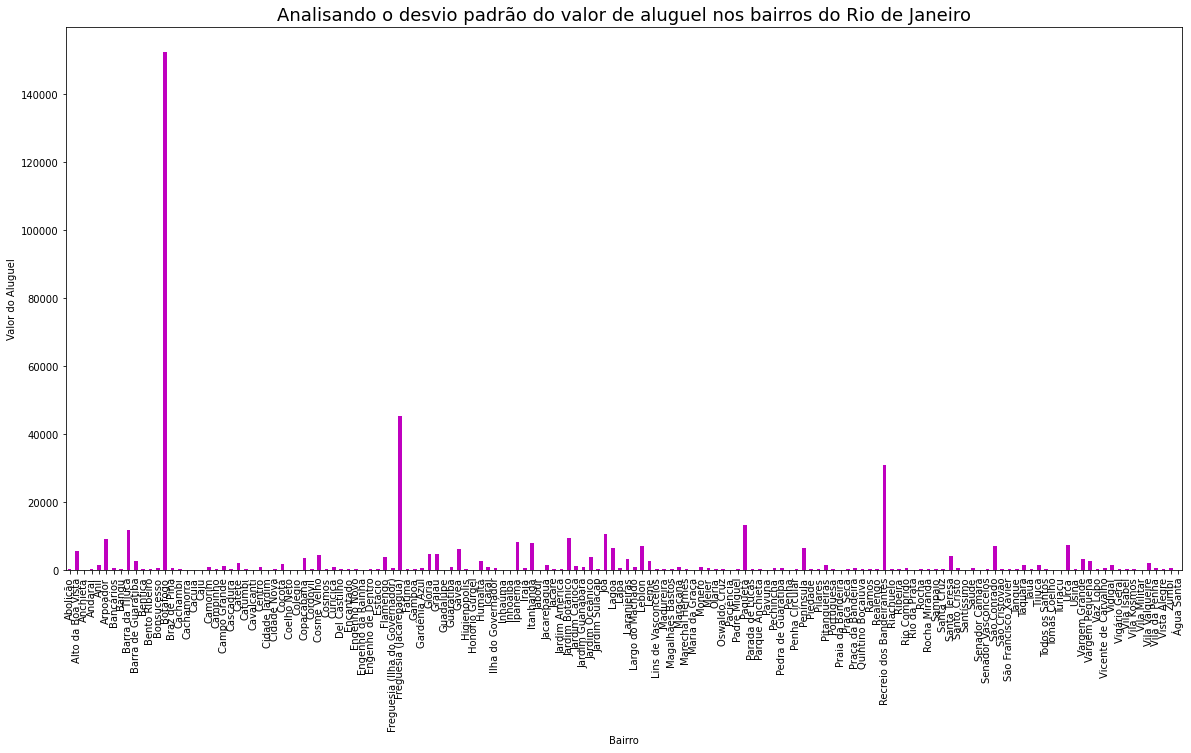

In [96]:
# primeiro plot - desvio padrão
ax = all_district['Valor'].std().plot.bar(color='m')
ax.set_ylabel('Valor do Aluguel')
ax.set_title('Analisando o desvio padrão do valor de aluguel nos bairros do Rio de Janeiro', fontsize=18)
ax = ax;

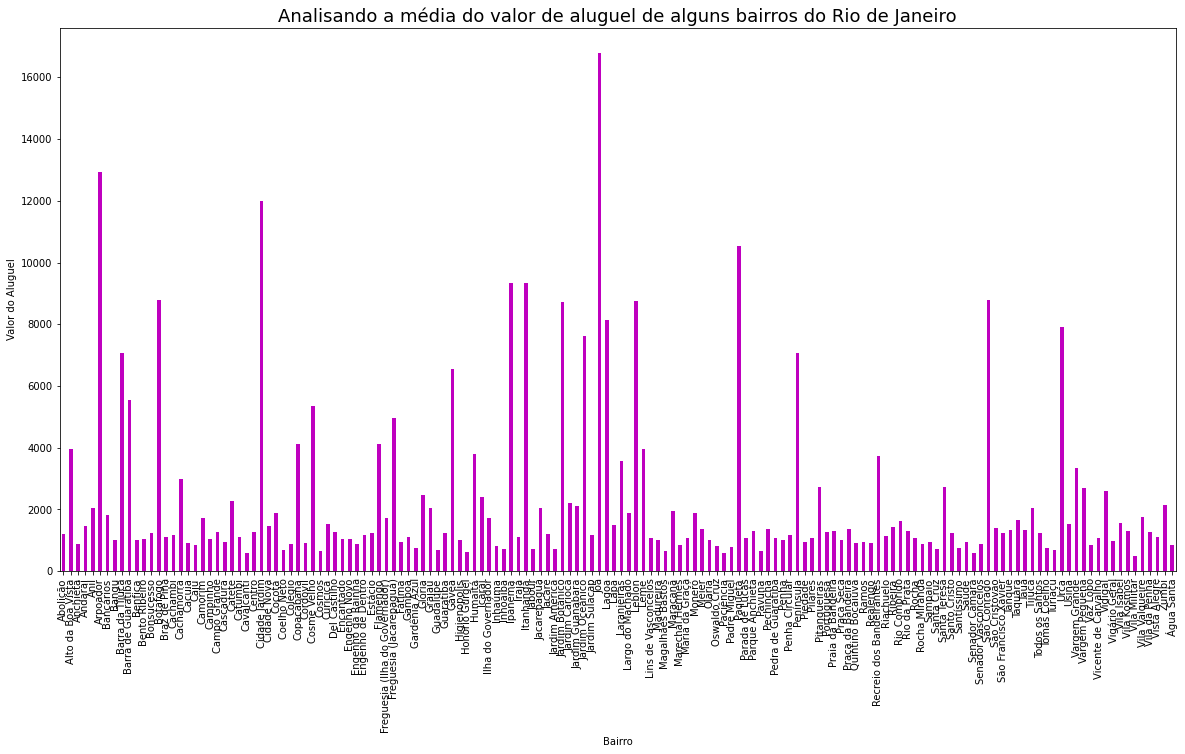

In [97]:
# plotando gráfico do grupo_bairro - média
ax = all_district['Valor'].mean().plot.bar(color='m')
ax.set_ylabel('Valor do Aluguel')
ax.set_title('Analisando a média do valor de aluguel de alguns bairros do Rio de Janeiro', fontsize=18)
ax = ax;

Nota-se que média e desvio padrao estão com valores bastante altos.

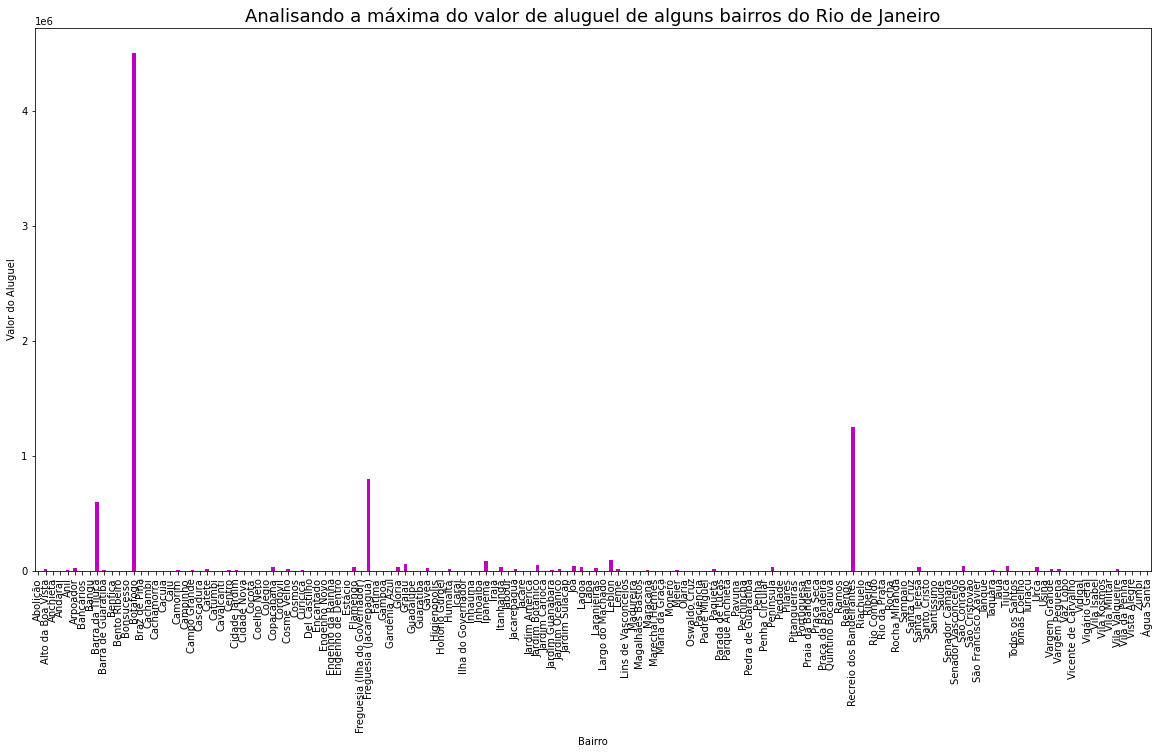

In [98]:
# plotando gráfico do grupo_bairro
ax = all_district['Valor'].max().plot.bar(color='m')
ax.set_ylabel('Valor do Aluguel')
ax.set_title('Analisando a máxima do valor de aluguel de alguns bairros do Rio de Janeiro', fontsize=18)
ax = ax;

# Relatório de análise VIII

### Identificando e removendo Outliers

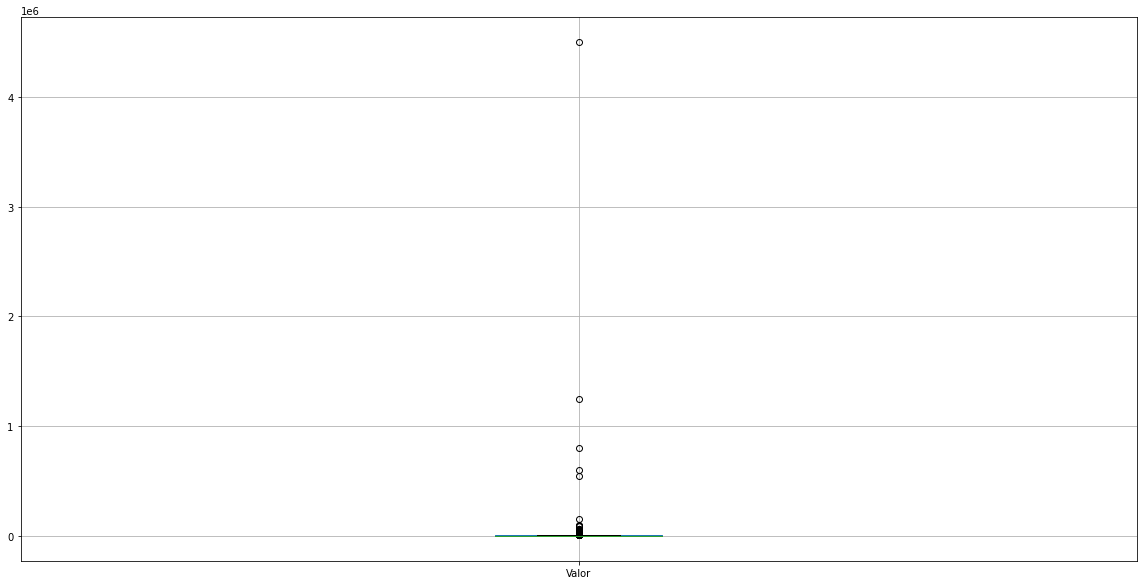

In [99]:
# fazendo o boxplot - passando o 'valor'
residential_data_2.boxplot(['Valor']);

Conseguimos ver apenas dados discrepantes

In [100]:
# visualizando que esta acima de 500000
residential_data_2[residential_data_2['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m²,Tipo Agregado
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [101]:
# criando uma series - para facilitar a digitação
data_values = residential_data_2['Valor']

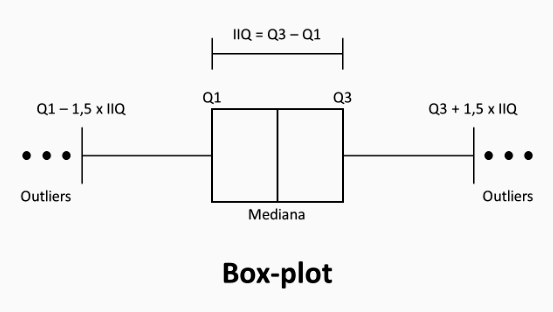

In [102]:
Q1 = data_values.quantile(.25)
Q3 = data_values.quantile(.75)
IIQ = Q3 - Q1
bottom_limit = Q1 - 1.5 * IIQ
higher_limit = Q3 + 1.5 * IIQ

In [103]:
selection = (data_values >= bottom_limit) & (data_values <= higher_limit)
new_result_data = residential_data_2[selection]

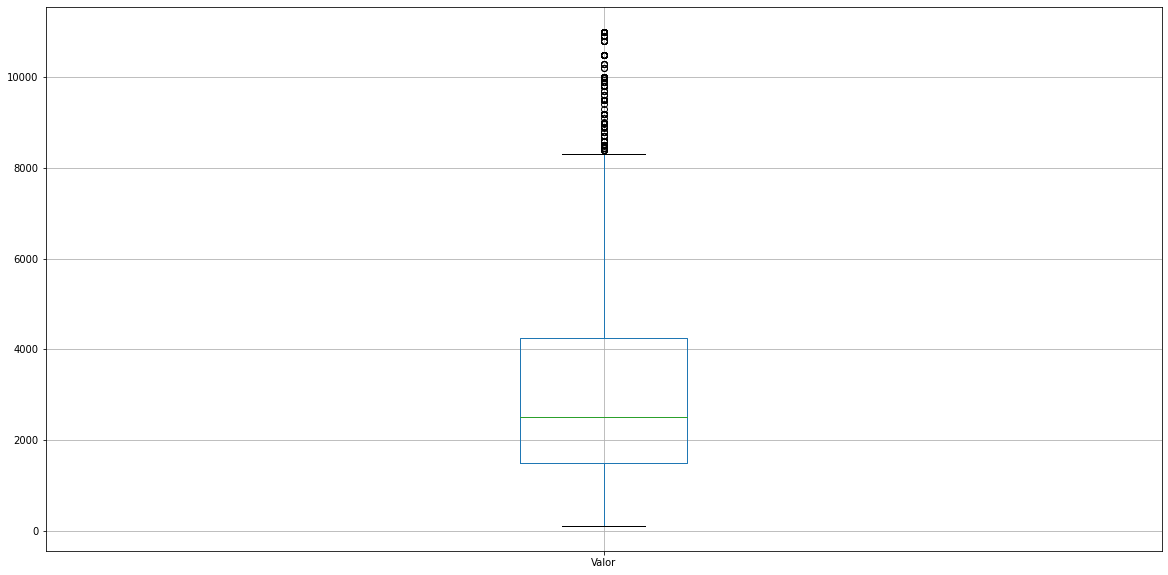

In [104]:
# fazendo agora boxplot com os novos dados
new_result_data.boxplot(['Valor']);

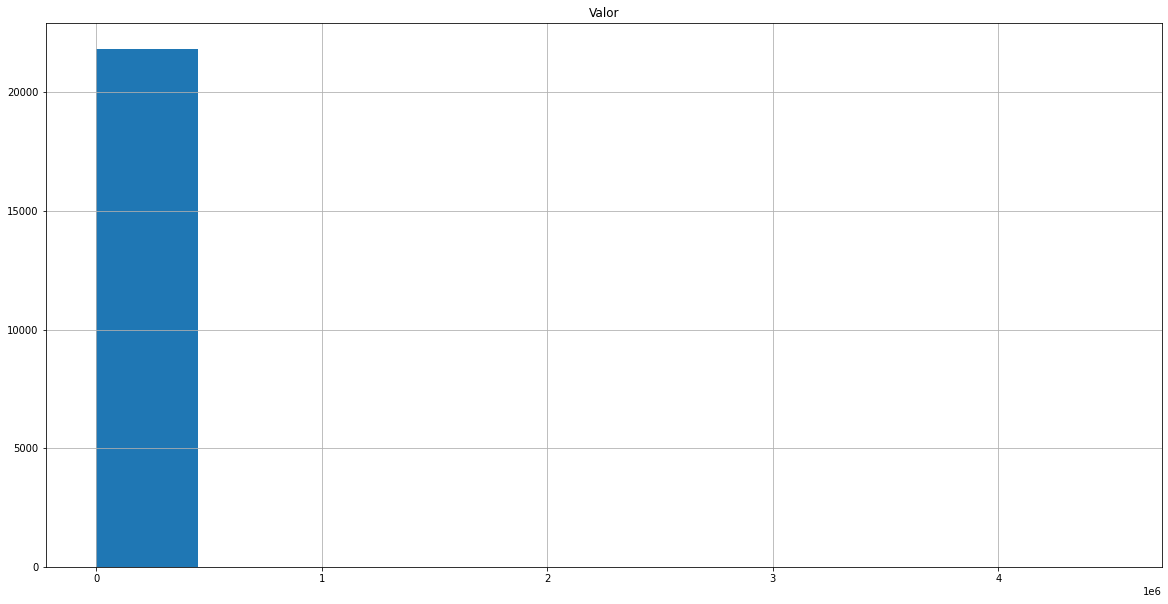

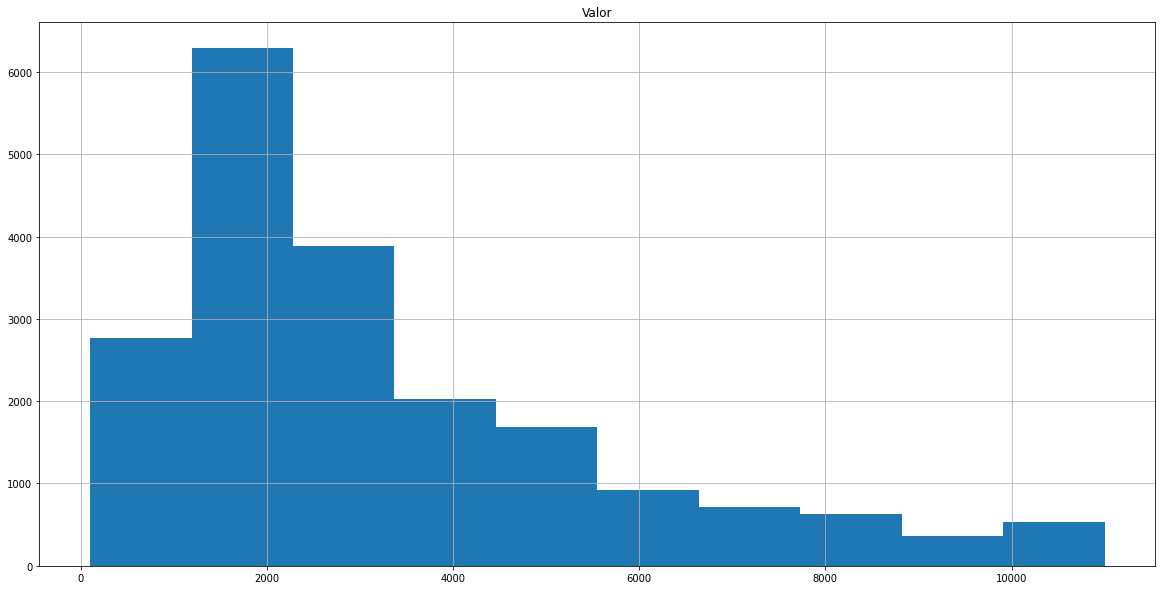

In [105]:
residential_data_2.hist(['Valor'])
new_result_data.hist(['Valor']);

### Identificando e removendo outlier por grupo

Teremos um box-plot pautado por tipo de imóvel:
- apartamento
- casa
- casa de vila
- casa de conndominio
- quitinete

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


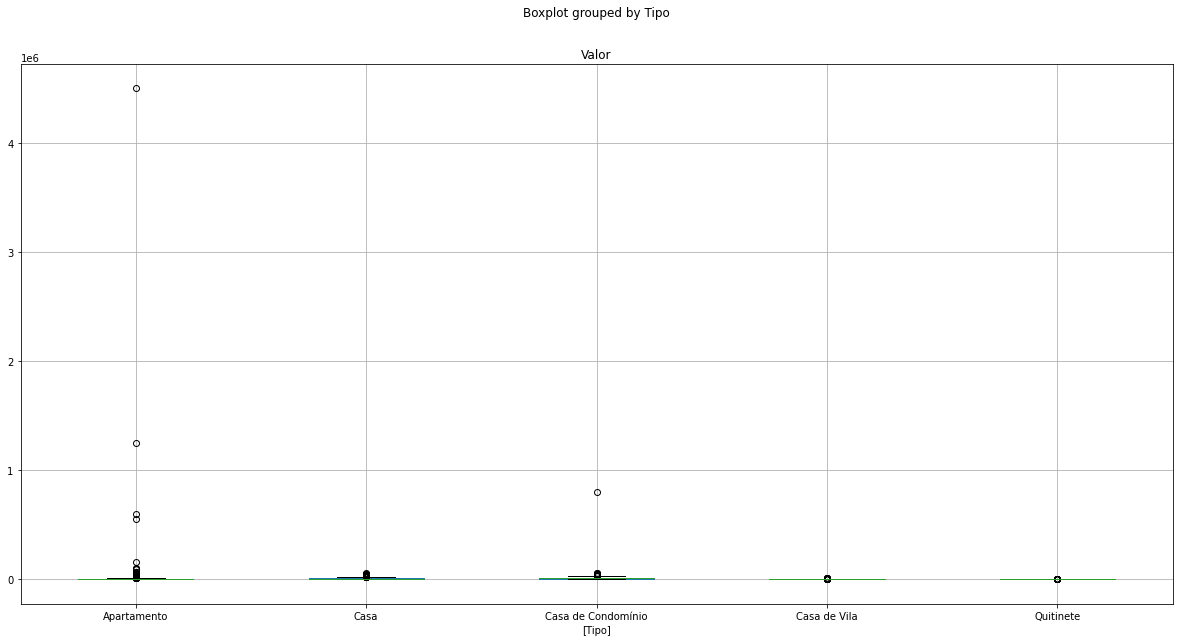

In [106]:
# usando tipo de imovel
# printando por tipo
residential_data_2.boxplot(['Valor'], by = ['Tipo']);

In [107]:
# criação de grupo
type_value_group = residential_data_2.groupby('Tipo')['Valor']

In [108]:
type(type_value_group)

pandas.core.groupby.generic.SeriesGroupBy

In [109]:
# vendo conteudo
type_value_group.groups

{'Apartamento': [2, 3, 5, 9, 10, 11, 13, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 59, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 84, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, ...], 'Casa': [1, 24, 56, 60, 100, 104, 150, 166, 188, 248, 260, 263, 274, 297, 321, 327, 345, 350, 368, 389, 396, 410, 436, 446, 486, 487, 493, 526, 558, 559, 583, 587, 588, 636, 639, 648, 654, 655, 680, 697, 721, 742, 745, 781, 792, 802, 880, 897, 962, 1011, 1059, 1066, 1149, 1154, 1156, 1189, 1211, 1284, 1291, 1354, 1373, 1388, 1409, 1451, 1465, 1469, 1480, 1485, 1513, 1516, 1530, 1630, 1649, 1705, 1711, 1715, 1721, 1734, 1760, 1768, 1815, 1865, 1890, 1930, 1961, 1989, 1998, 2017, 2082, 2102, 2119, 2139, 2165, 2171, 2172, 2199, 2238, 2270, 2273, 2280, ...],

In [110]:
# criando estatística e limites
Q1 = type_value_group.quantile(.25)
Q3 = type_value_group.quantile(.75)
IIQ = Q3 - Q1
bottom_limit = Q1 - 1.5 * IIQ
higher_limit = Q3 + 1.5 * IIQ

In [111]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [112]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [113]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [114]:
bottom_limit

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [115]:
higher_limit

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [116]:
# limite superior de um imovel
higher_limit['Apartamento']

9950.0

In [117]:
higher_limit['Casa']

22850.0

In [118]:
new_result_data = pd.DataFrame() # fazendo um dataframe zerado
for tipo in type_value_group.groups.keys():
    is_type = residential_data_2['Tipo'] == tipo
    inside_limit = (residential_data_2['Valor'] >= bottom_limit[tipo]) & (residential_data_2['Valor'] <= higher_limit[tipo])
    selection = is_type & inside_limit
    data_selection = residential_data_2[selection]
    new_result_data = pd.concat([new_result_data, data_selection])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


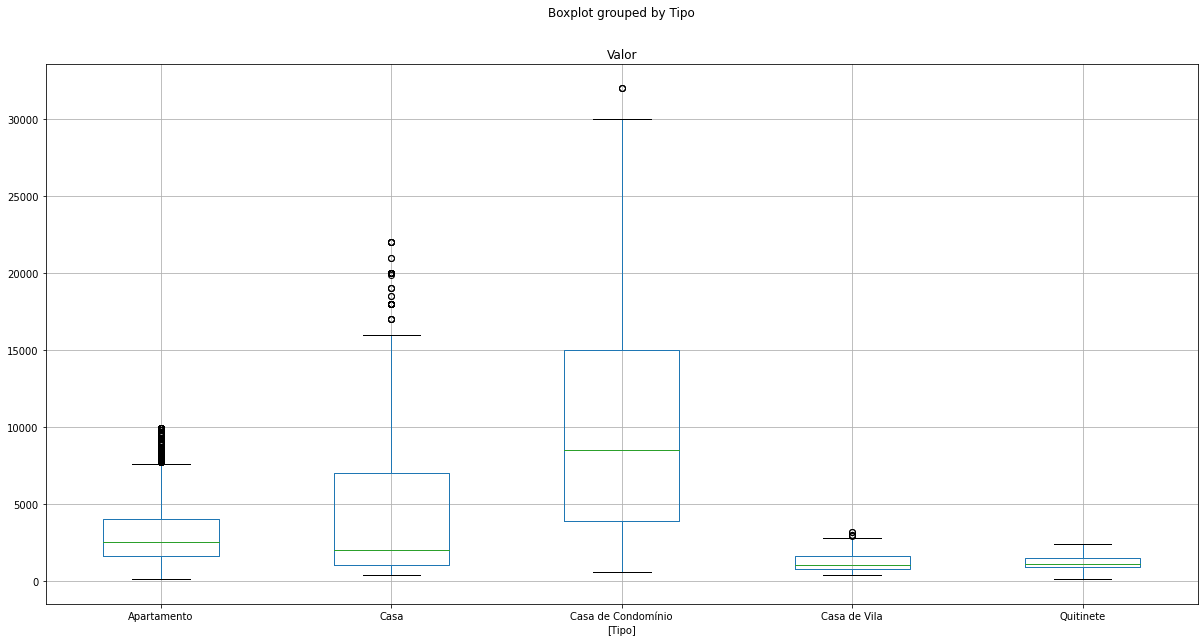

In [119]:
new_result_data.boxplot(['Valor'], by = ['Tipo']);

In [120]:
new_result_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Data_Science/PYTHON-PANDAS-TRATANDO-ANALISANDO-DADOS/aluguel_residencial_sem_outliers.csv', sep=';', index=False)